# Dataiku Technical Assessment - US Census Income Modelling

In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pd.options.display.max_columns = 50

In [2]:
us_census_train = pd.read_csv('us_census_full/census_income_learn.csv', 
                              header = None, skipinitialspace = True, na_values= 'Not in universe')

In [3]:
with open('us_census_full/census_income_metadata.txt', 'r') as f:
    for lineNo, line in enumerate(f.readlines()):
        print(lineNo, line)

0 | This data was extracted from the census bureau database found at

1 | http://www.census.gov/ftp/pub/DES/www/welcome.html

2 | Donor: Terran Lane and Ronny Kohavi

3 |        Data Mining and Visualization

4 |        Silicon Graphics.

5 |        e-mail: terran@ecn.purdue.edu, ronnyk@sgi.com for questions.

6 |

7 | The data was split into train/test in approximately 2/3, 1/3

8 | proportions using MineSet's MIndUtil mineset-to-mlc.

9 |

10 | Prediction task is to determine the income level for the person

11 | represented by the record.  Incomes have been binned at the $50K

12 | level to present a binary classification problem, much like the

13 | original UCI/ADULT database.  The goal field of this data, however,

14 | was drawn from the "total person income" field rather than the

15 | "adjusted gross income" and may, therefore, behave differently than the

16 | orginal ADULT goal field.

17 |

18 | More information detailing the meaning of the attributes can be

19 | found in 

In [4]:
columns = []
with open('us_census_full/census_income_metadata.txt', 'r') as f:
    for lineNo, line in enumerate(f.readlines()):
        if lineNo > 141:
            featureName = line.split(':')[0]
            featureName = featureName.replace(' ', '_')
            columns.append(featureName)
    print(columns)

['age', 'class_of_worker', 'detailed_industry_recode', 'detailed_occupation_recode', 'education', 'wage_per_hour', 'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses', 'dividends_from_stocks', 'tax_filer_stat', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', '|_instance_weight', 'instance_weight', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', "fill_inc_questionnaire_for_veteran's_admin", 'vete

In [5]:
columns.remove('|_instance_weight')
columns.append('incomeBracket')

In [6]:
us_census_train.columns = columns

In [33]:
us_census_train.head(50)

age                 class_of_worker  detailed_industry_recode  \
0    73                             NaN                         0   
1    58  Self-employed-not incorporated                         4   
2    18                             NaN                         0   
3     9                             NaN                         0   
4    10                             NaN                         0   
5    48                         Private                        40   
6    42                         Private                        34   
7    28                         Private                         4   
8    47                Local government                        43   
9    34                         Private                         4   
10    8                             NaN                         0   
11   32                             NaN                         0   
12   51                         Private                         4   
13   46                         Private                        37   
14   26                         Private                        24   
15   13                             NaN                         0   
16   47                         Private                        39   
17   39                             NaN                         0   
18   16                             NaN                         0   
19   35                         Private                        12   
20   12                             NaN                         0   
21   27  Self-employed-not incorporated                         4   
22   56                         Private                        35   
23   46                         Private                        45   
24   55                             NaN                         0   
25    2                             NaN                         0   
26    1                             NaN                         0   
27   37                         Private                         3   
28    4                             NaN                         0   
29   37                         Private                         4   
30   63                         Private                        19   
31   34              Federal government                        29   
32   46  Self-employed-not incorporated                         4   
33   25                         Private                        45   
34   81                             NaN                         0   
35   46                         Private                        32   
36   39                         Private                        34   
37   42              Federal government                        48   
38    2                             NaN                         0   
39   11                             NaN                         0   
40   30                             NaN                         0   
41    7                             NaN                         0   
42   66  Self-employed-not incorporated                        33   
43   26                             NaN                         0   
44   84                             NaN                         0   
45   32                         Private                        33   
46   52                             NaN                         0   
47    5                             NaN                         0   
48   35                             NaN                         0   
49   66                         Private                        37   

    detailed_occupation_recode                               education  \
0                            0                    High school graduate   
1                           34              Some college but no degree   
2                            0                              10th grade   
3                            0                                Children   
4                            0                                Children   
5                           10          

## Data Cleaning

In [32]:
us_census_train['binaryIncome'] = (us_census_train['incomeBracket'] == '50000+.').astype(int)
us_census_train.drop('incomeBracket', axis=1, inplace=True)

In [8]:
us_census_train.describe(include='all')

age class_of_worker  detailed_industry_recode  \
count   199523.000000           99278             199523.000000   
unique            NaN               8                       NaN   
top               NaN         Private                       NaN   
freq              NaN           72028                       NaN   
mean        34.494199             NaN                 15.352320   
std         22.310895             NaN                 18.067129   
min          0.000000             NaN                  0.000000   
25%         15.000000             NaN                  0.000000   
50%         33.000000             NaN                  0.000000   
75%         50.000000             NaN                 33.000000   
max         90.000000             NaN                 51.000000   

        detailed_occupation_recode             education  wage_per_hour  \
count                199523.000000                199523  199523.000000   
unique                         NaN                    17            NaN   
top                            NaN  High school graduate            NaN   
freq                           NaN                 48407            NaN   
mean                     11.306556                   NaN      55.426908   
std                      14.454204                   NaN     274.896454   
min                       0.000000                   NaN       0.000000   
25%                       0.000000                   NaN       0.000000   
50%                       0.000000                   NaN       0.000000   
75%                      26.000000                   NaN       0.000000   
max                      46.000000                   NaN    9999.000000   

       enroll_in_edu_inst_last_wk   marital_stat          major_industry_code  \
count                       12580         199523                       199523   
unique                          2              7                           24   
top                   High school  Never married  Not in universe or children   
freq                         6892          86485                       100684   
mean                          NaN            NaN                          NaN   
std                           NaN            NaN                          NaN   
min                           NaN            NaN                          NaN   
25%                           NaN            NaN                          NaN   
50%                           NaN            NaN                          NaN   
75%                           NaN            NaN                          NaN   
max                           NaN            NaN                          NaN   

                 major_occupation_code    race hispanic_origin     sex  \
count                            98839  199523          198649  199523   
unique                              14       5               9       2   
top     Adm support including clerical   White       All other  Female   
freq                             14837  167365          171907  103984   
mean                               NaN     NaN             NaN     NaN   
std                                NaN     NaN             NaN     NaN   
min                                NaN     NaN             NaN     NaN   
25%                                NaN     NaN             NaN     NaN   
50%                                NaN     NaN             NaN     NaN   
75%                                NaN     NaN             NaN     NaN   
max                                NaN     NaN             NaN     NaN   

       member_of_a_labor_union reason_for_unemployment  \
count                    19064                    6070   
unique                       2                       5   
top                         No         Other job loser   
freq                     16034                    2038   
mean                       NaN                     NaN   
std                        NaN                     NaN   
min                        NaN              

In [9]:
us_census_train = us_census_train.replace('\?', np.nan, regex=True)

In [10]:
for col in us_census_train.columns:
    nullPercent = (us_census_train[col].isna().sum()/len(us_census_train[col]))*100
    print('{} : {:.2f}% null'.format(col, nullPercent))

age : 0.00% null
class_of_worker : 50.24% null
detailed_industry_recode : 0.00% null
detailed_occupation_recode : 0.00% null
education : 0.00% null
wage_per_hour : 0.00% null
enroll_in_edu_inst_last_wk : 93.69% null
marital_stat : 0.00% null
major_industry_code : 0.00% null
major_occupation_code : 50.46% null
race : 0.00% null
hispanic_origin : 0.44% null
sex : 0.00% null
member_of_a_labor_union : 90.45% null
reason_for_unemployment : 96.96% null
full_or_part_time_employment_stat : 0.00% null
capital_gains : 0.00% null
capital_losses : 0.00% null
dividends_from_stocks : 0.00% null
tax_filer_stat : 0.00% null
region_of_previous_residence : 92.09% null
state_of_previous_residence : 92.45% null
detailed_household_and_family_stat : 0.00% null
detailed_household_summary_in_household : 0.00% null
instance_weight : 0.00% null
migration_code-change_in_msa : 50.73% null
migration_code-change_in_reg : 50.73% null
migration_code-move_within_reg : 50.73% null
live_in_this_house_1_year_ago : 0.00% 

In [43]:
us_census_train[us_census_train.select_dtypes(['object']).columns] = us_census_train.select_dtypes(['object']).apply(lambda x: x.astype('category'))
us_census_train[['detailed_industry_recode','detailed_occupation_recode','own_business_or_self_employed','veterans_benefits','year']] = us_census_train[['detailed_industry_recode','detailed_occupation_recode','own_business_or_self_employed','veterans_benefits','year']].astype('category')

In [44]:
us_census_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                                           199523 non-null int64
class_of_worker                               99278 non-null category
detailed_industry_recode                      199523 non-null category
detailed_occupation_recode                    199523 non-null category
education                                     199523 non-null category
wage_per_hour                                 199523 non-null int64
enroll_in_edu_inst_last_wk                    12580 non-null category
marital_stat                                  199523 non-null category
major_industry_code                           199523 non-null category
major_occupation_code                         98839 non-null category
race                                          199523 non-null category
hispanic_origin                               198649 non-null category
sex                                           

## Data Visualisation

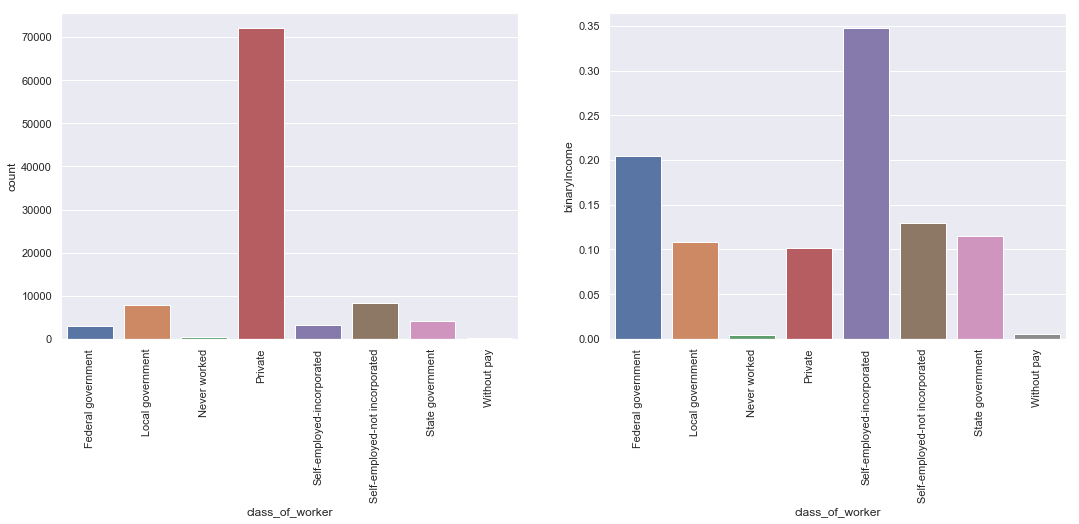

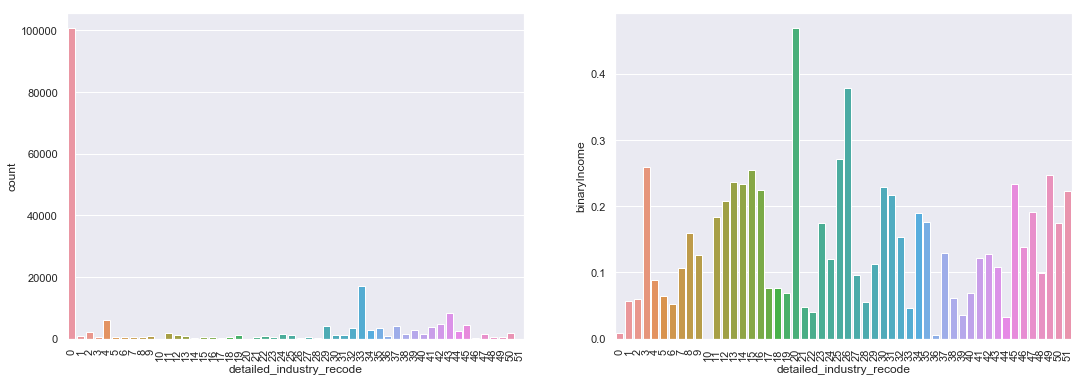

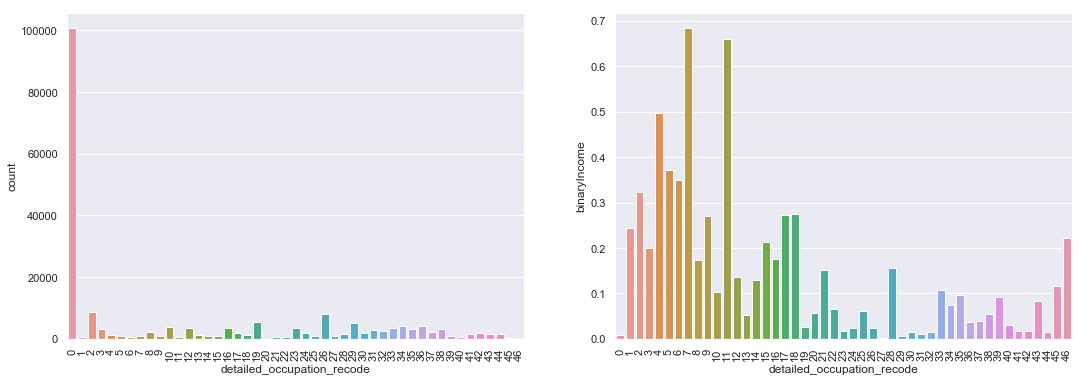

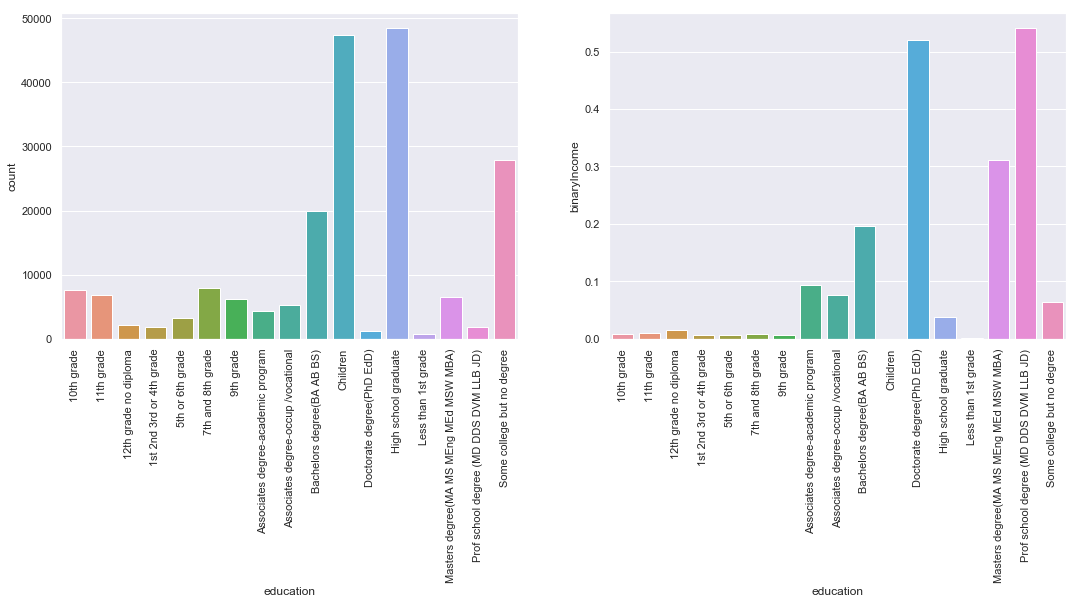

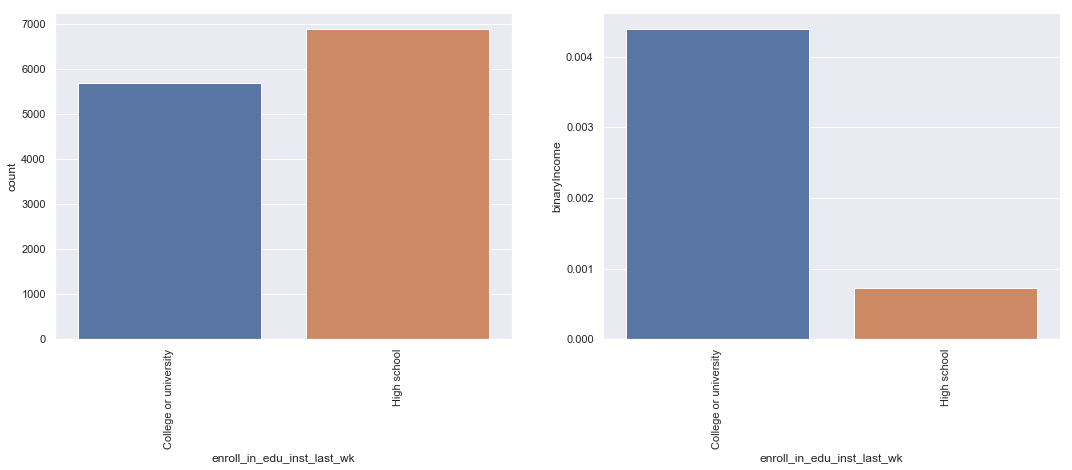

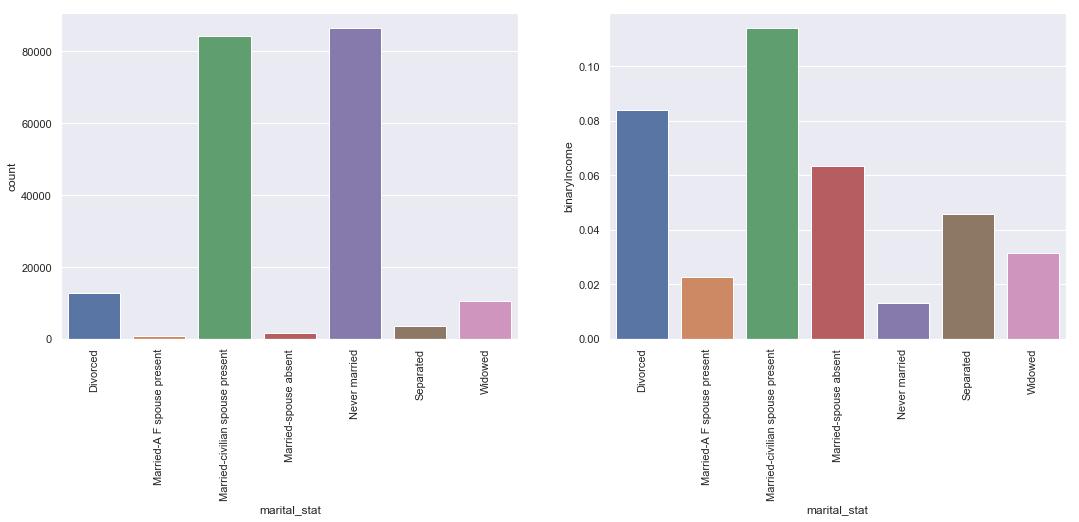

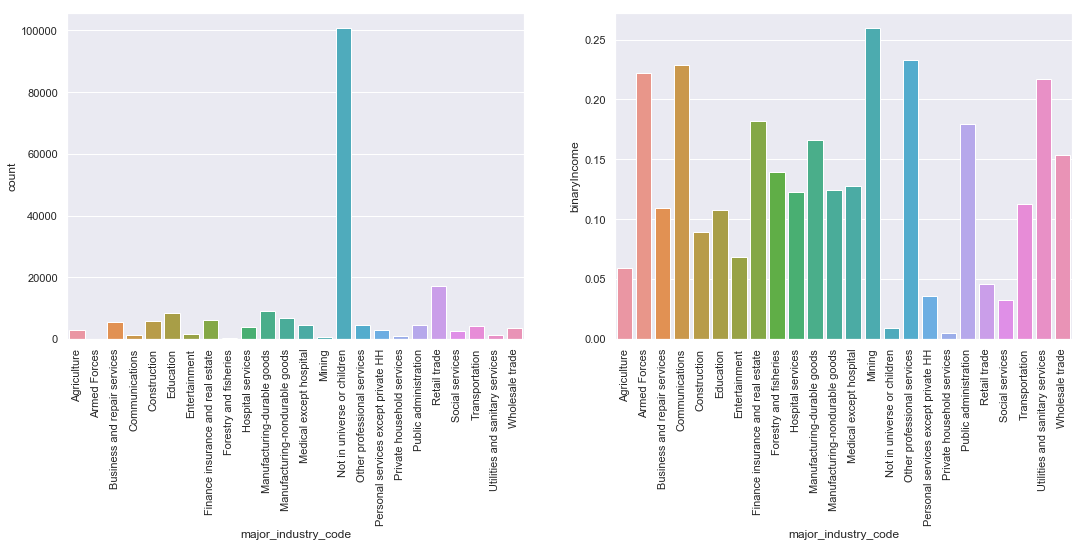

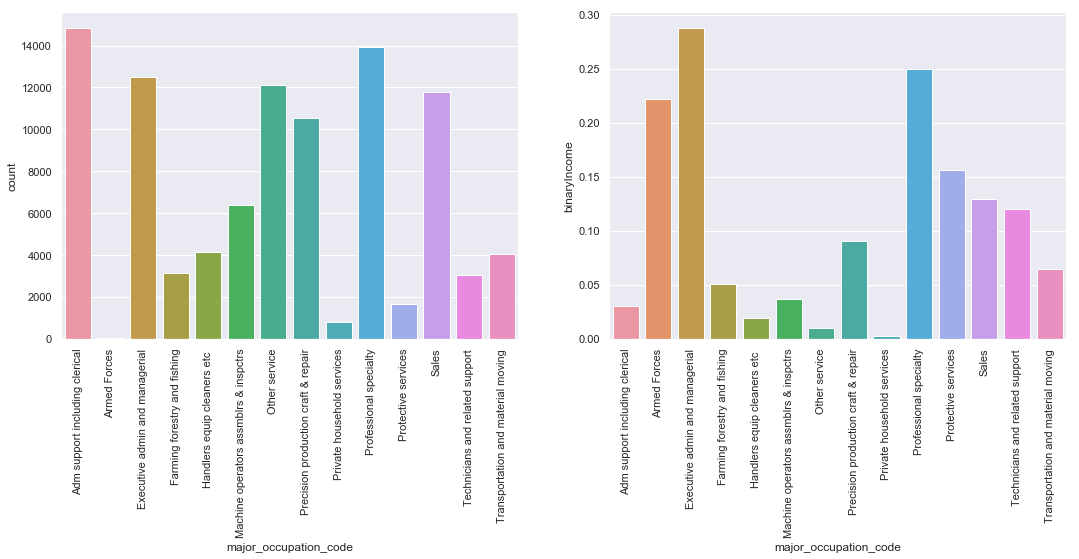

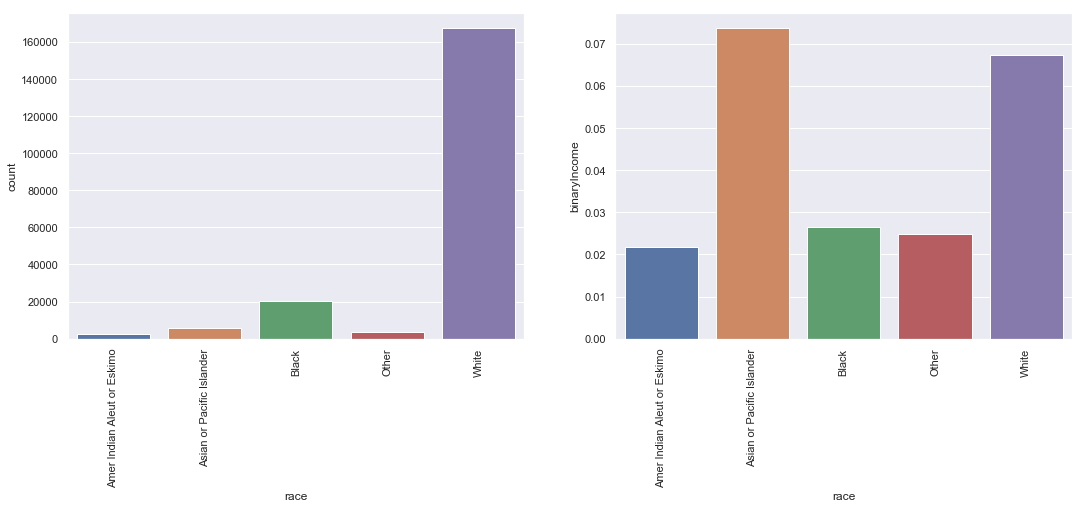

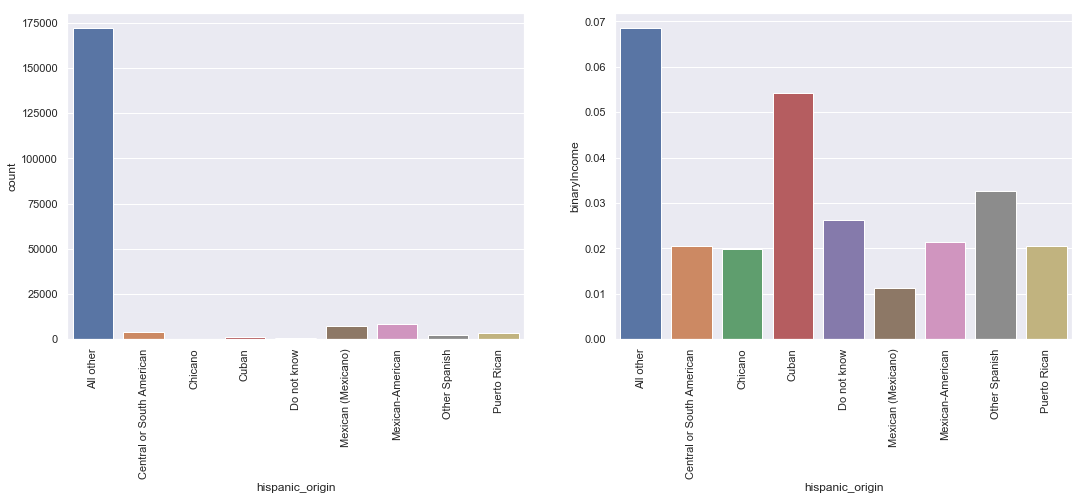

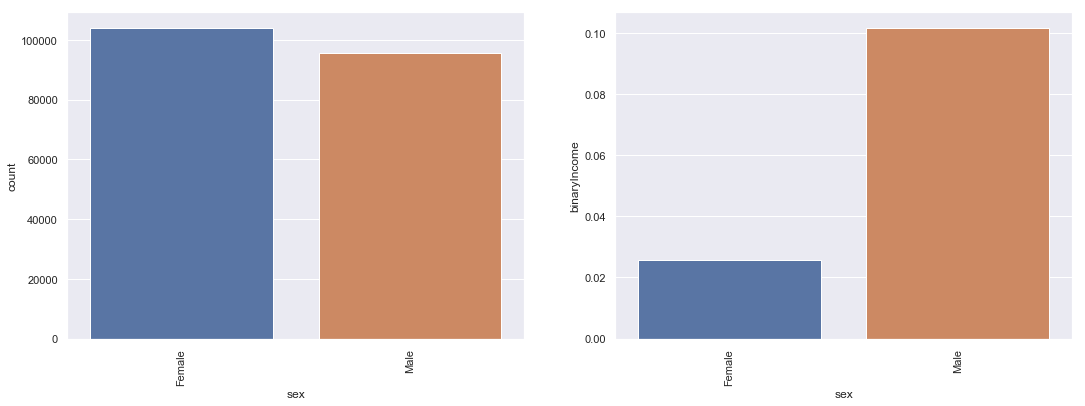

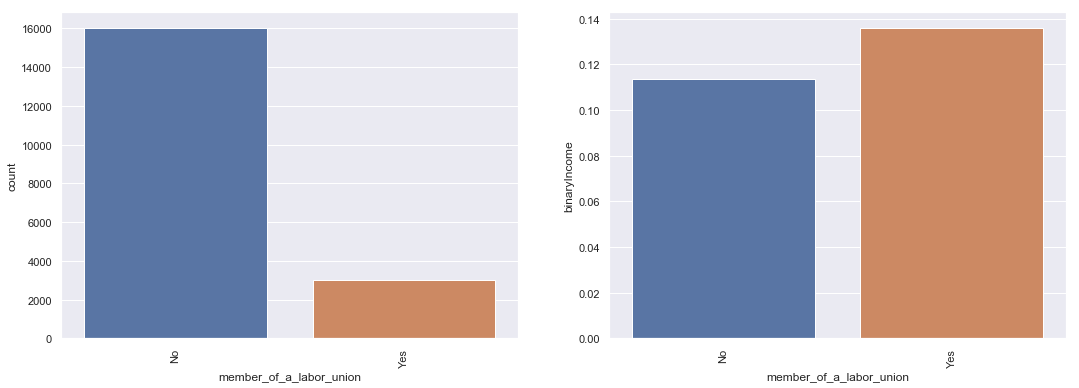

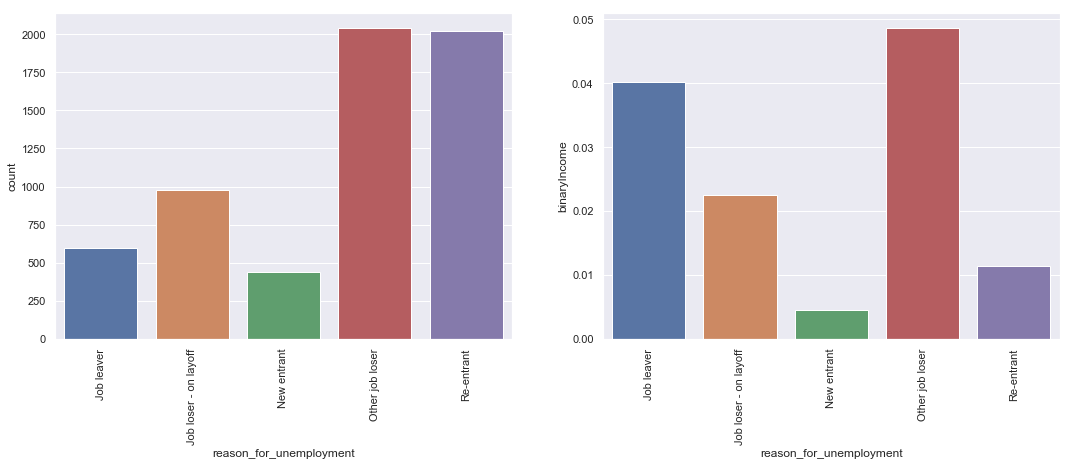

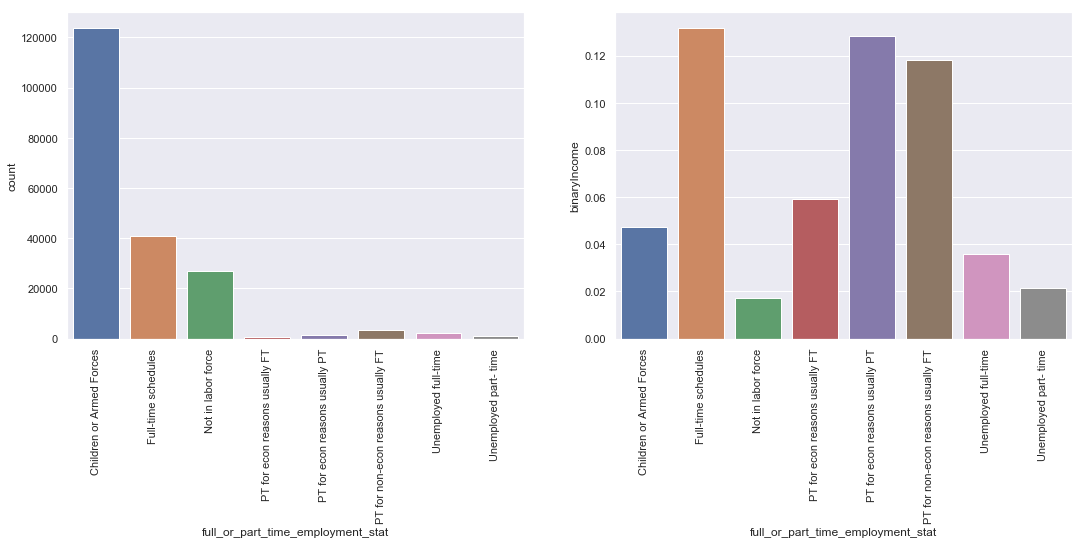

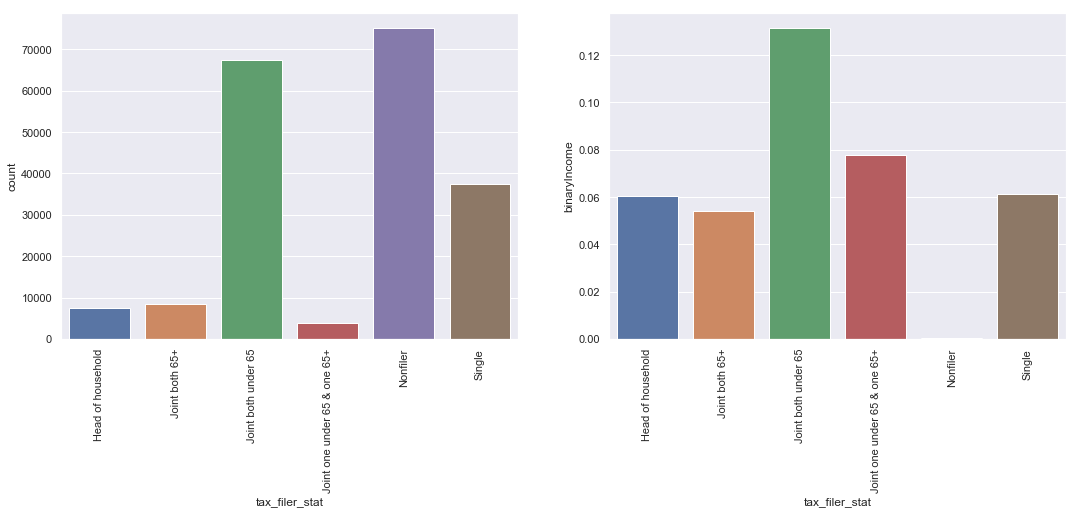

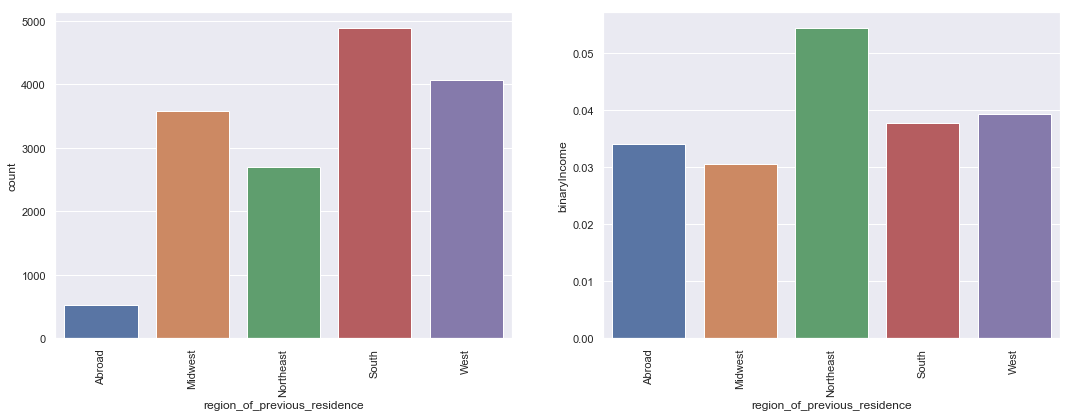

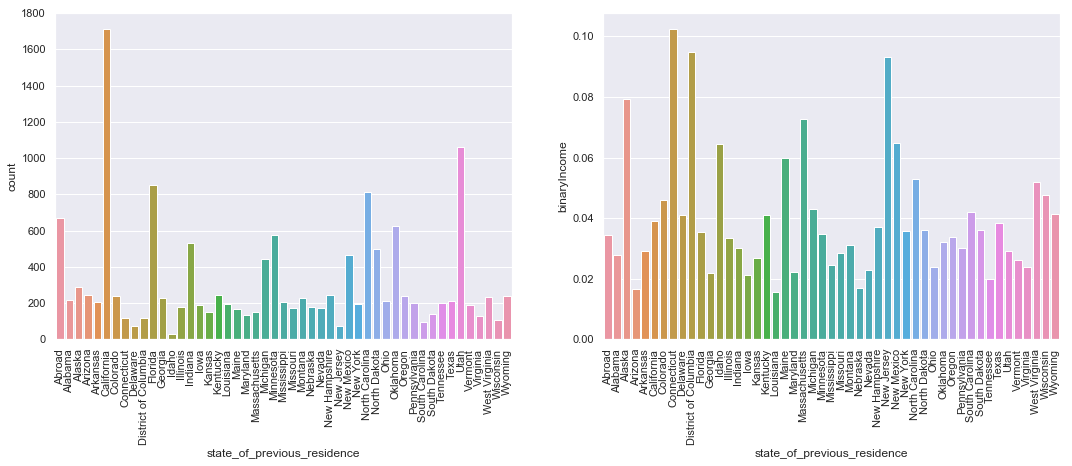

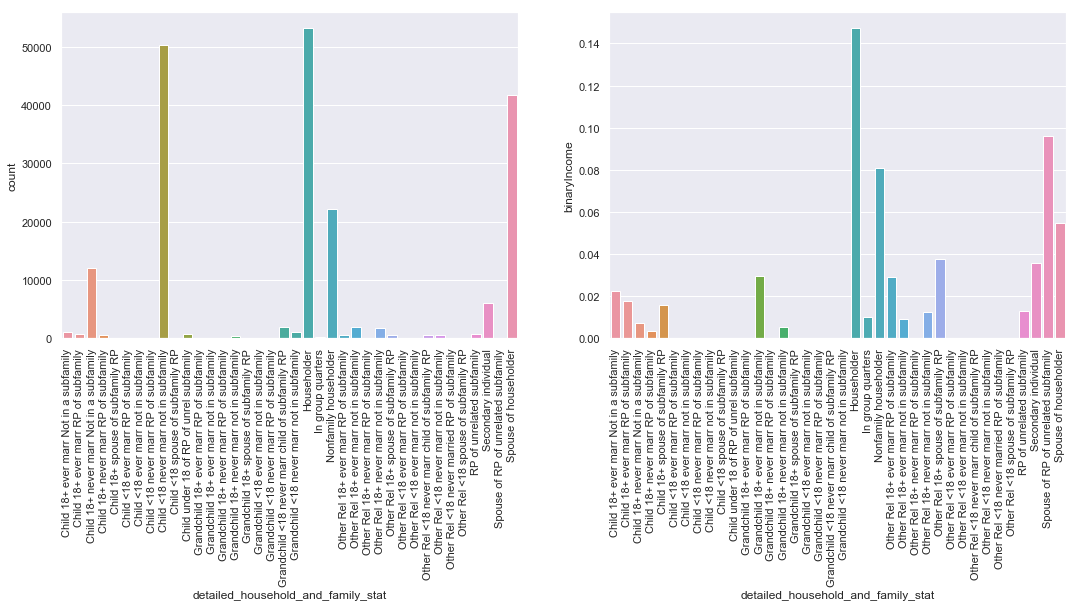

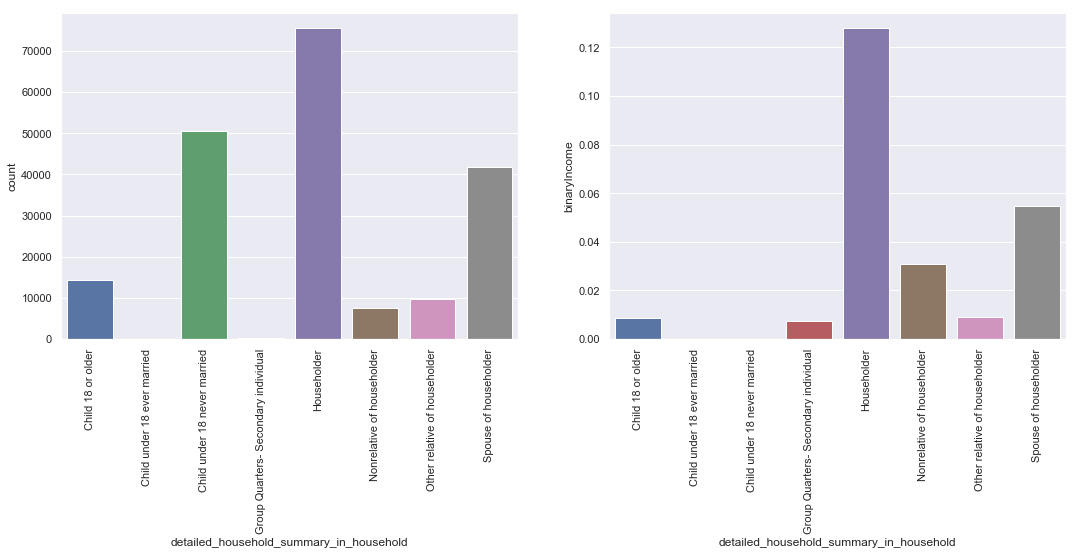

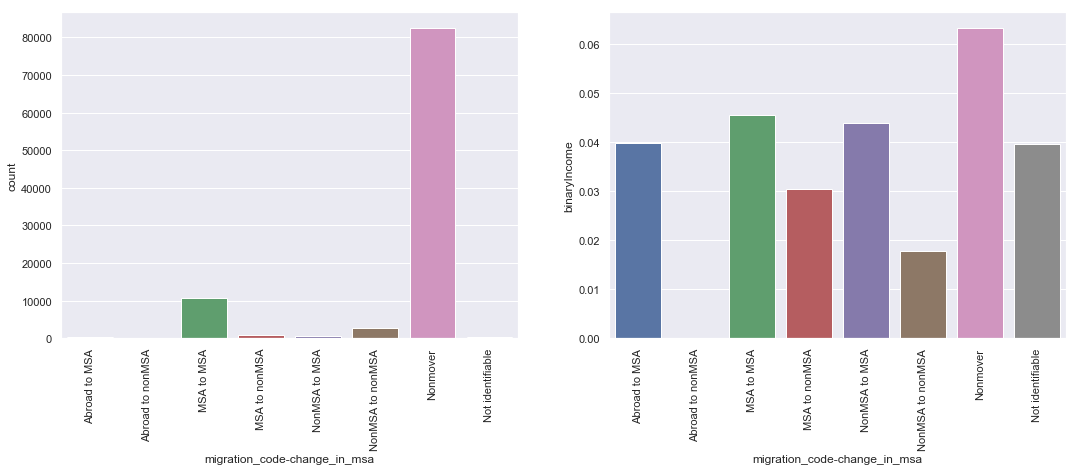

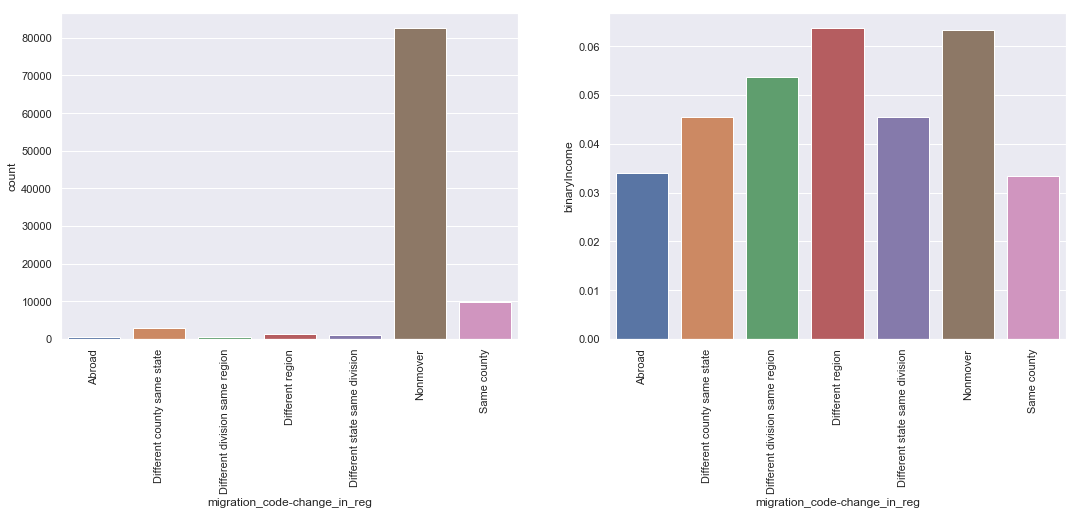

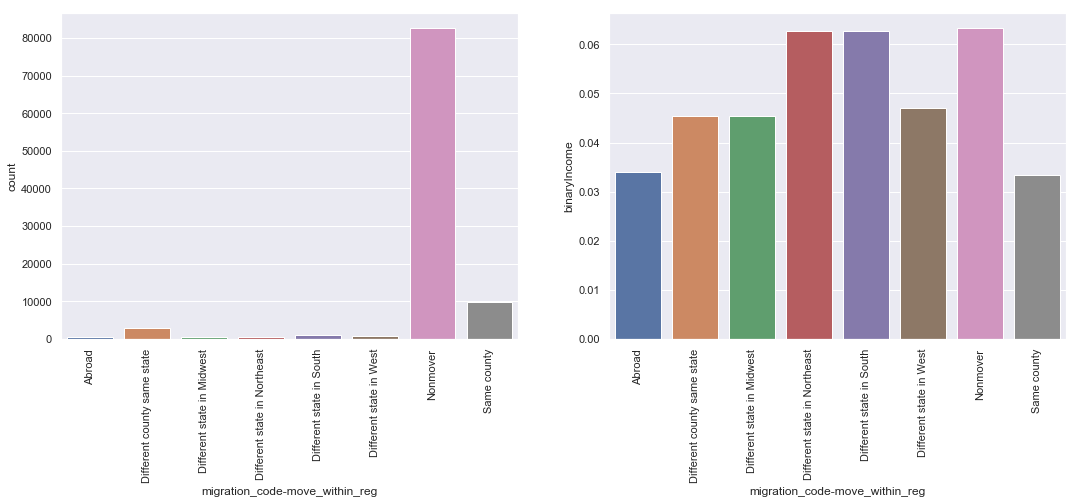

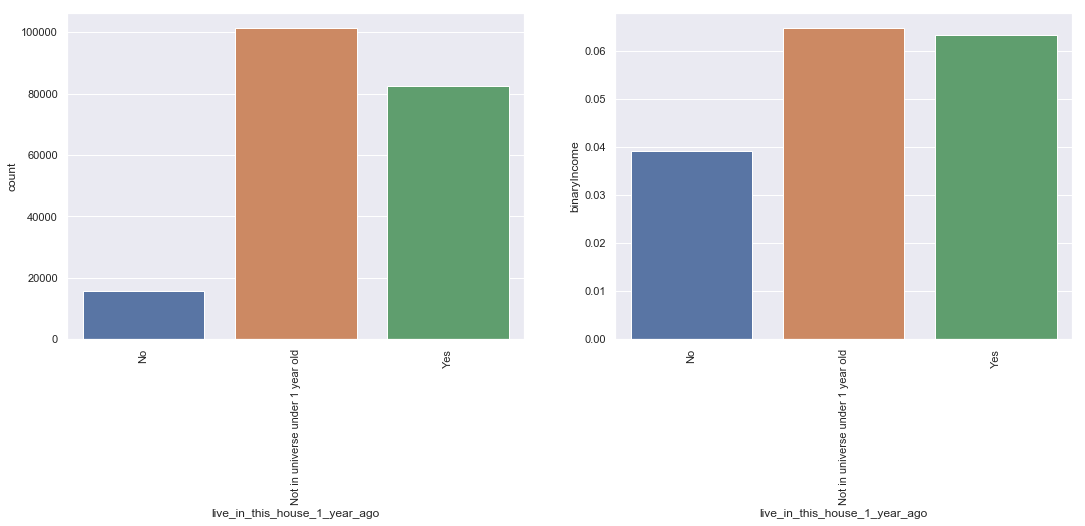

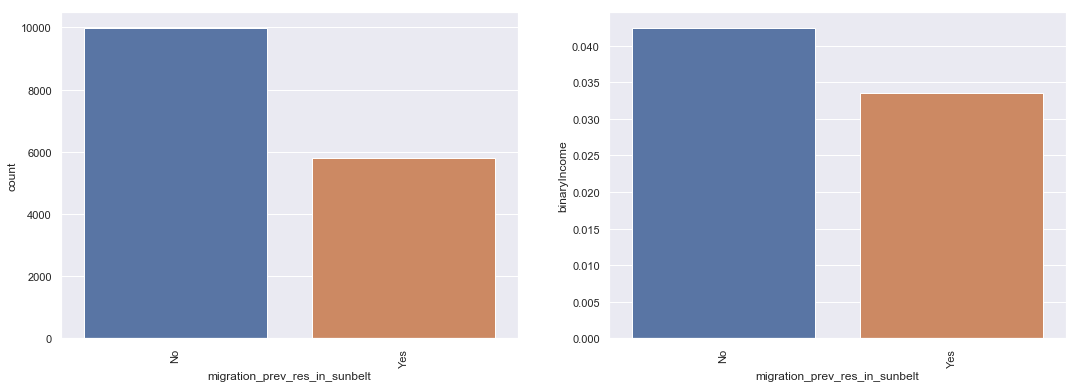

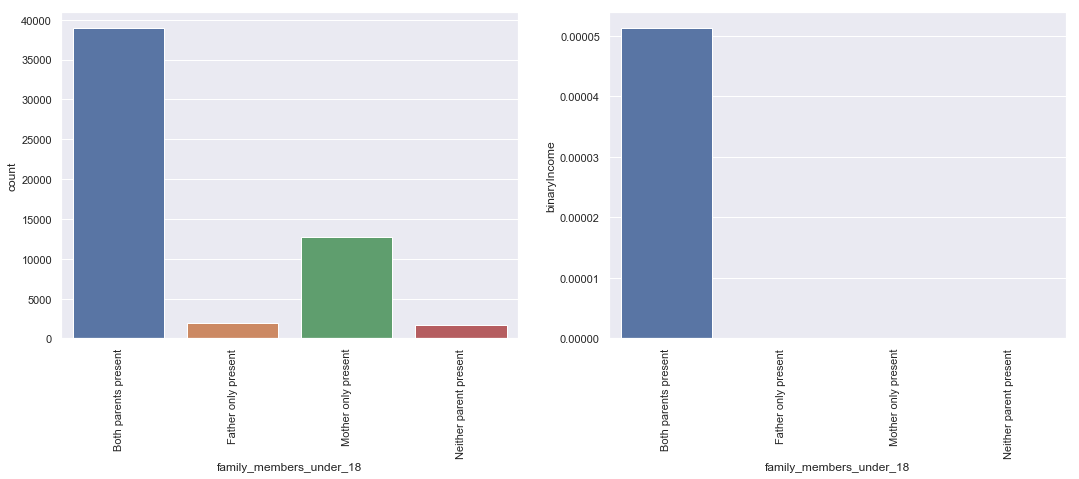

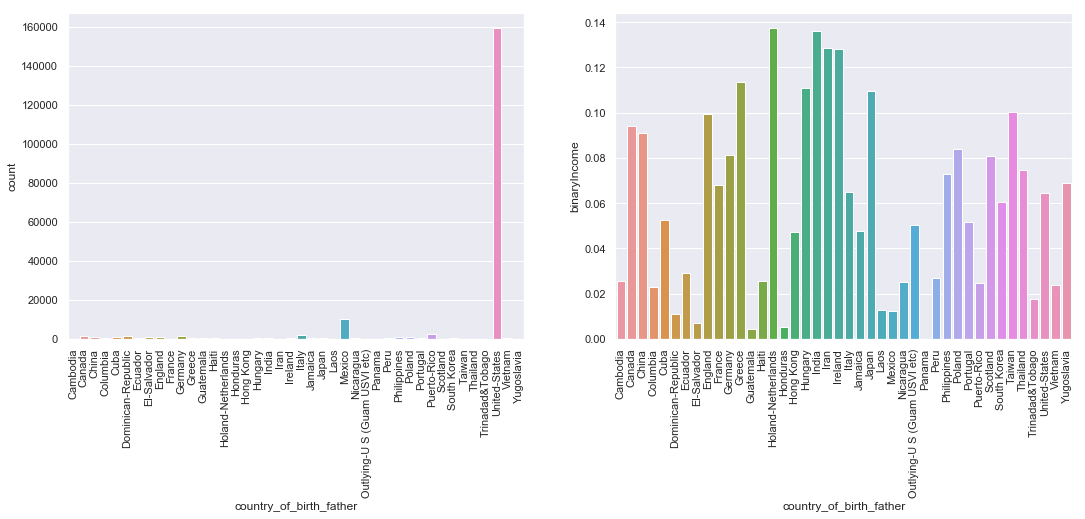

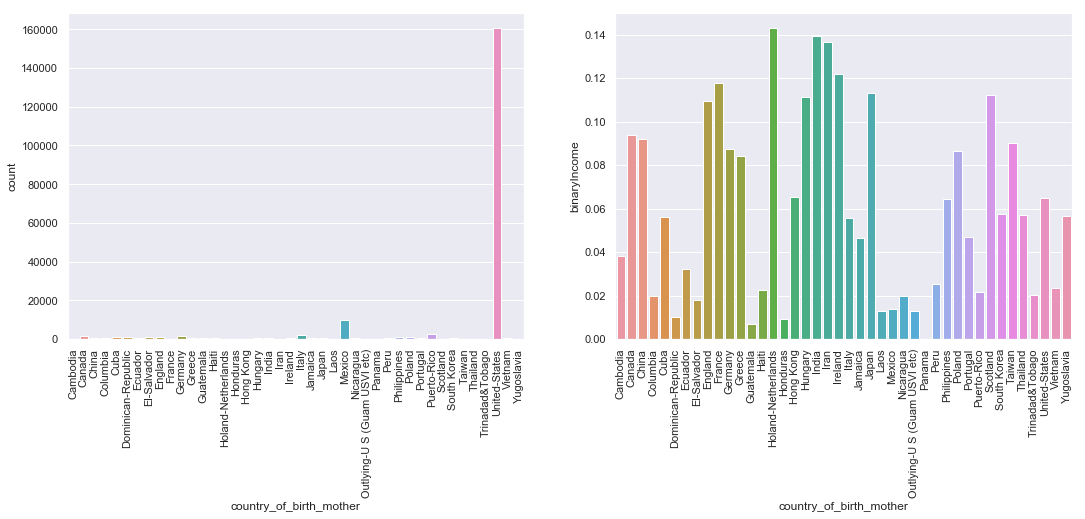

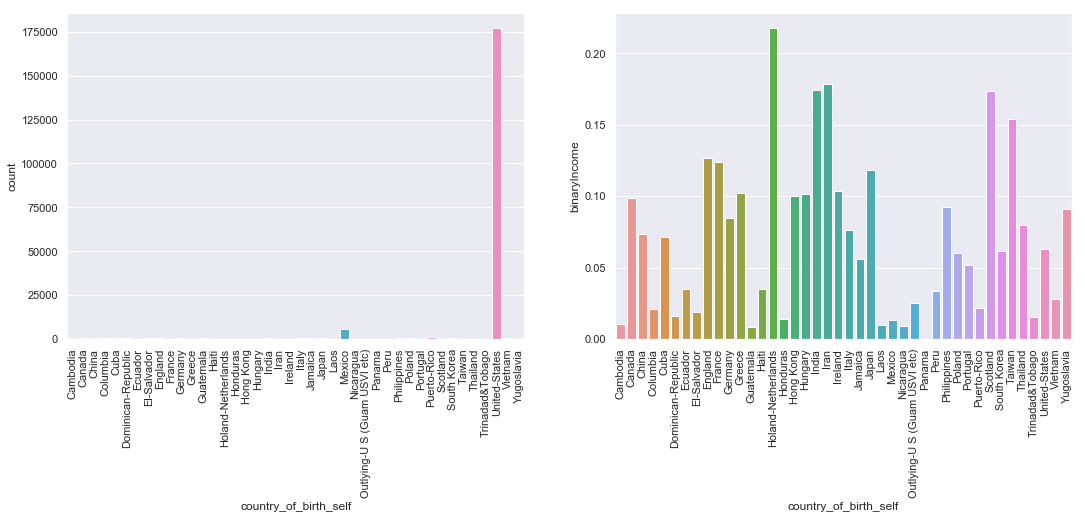

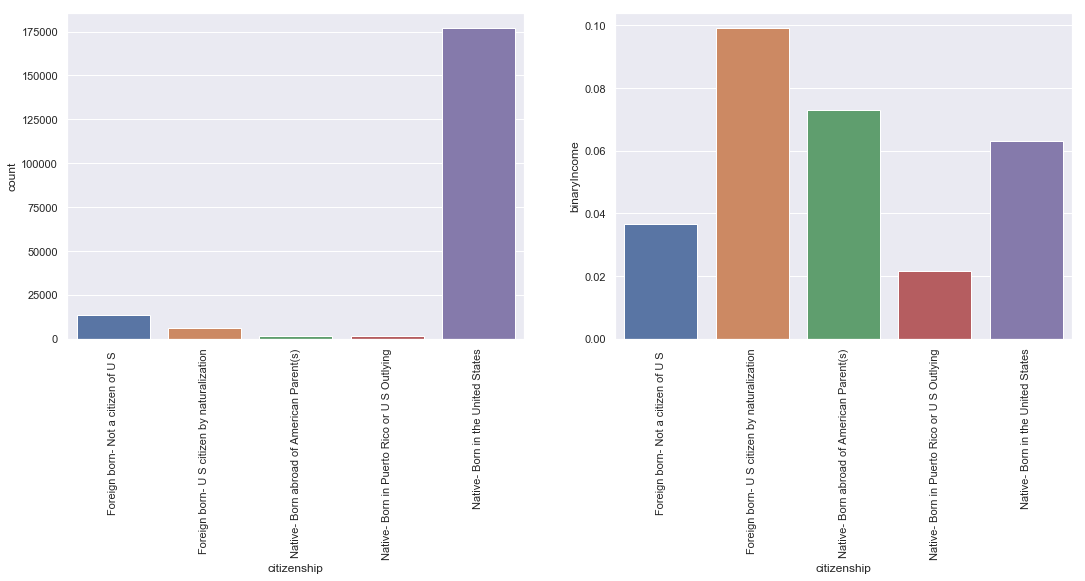

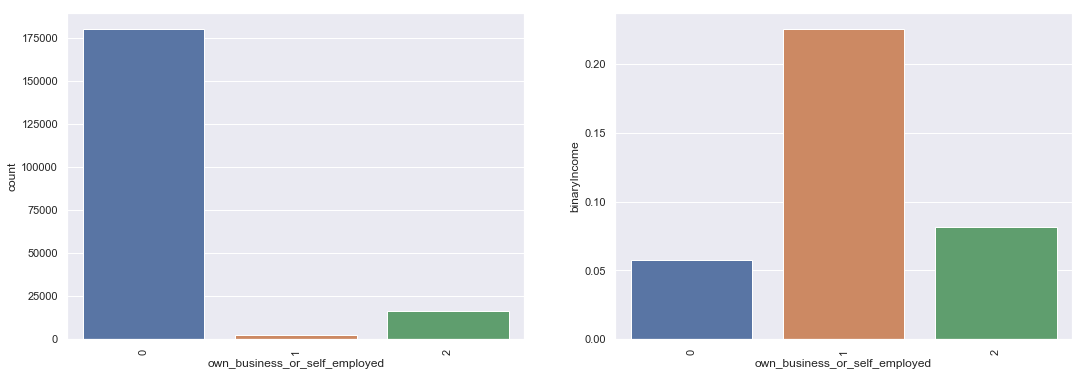

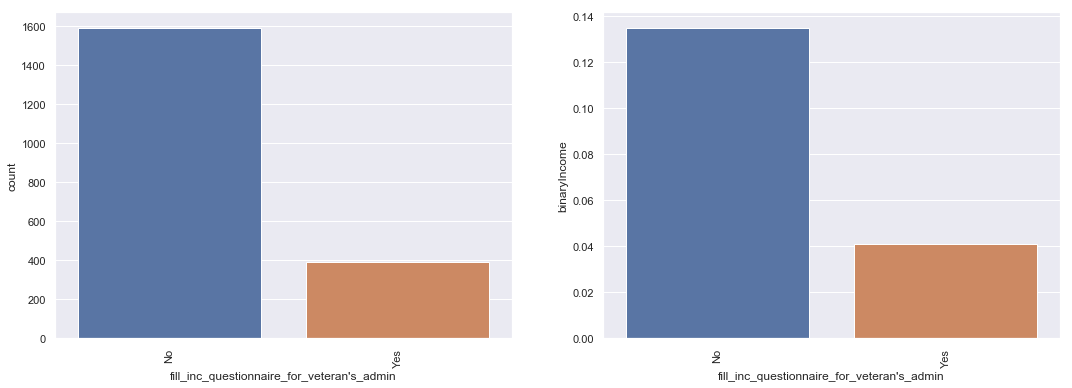

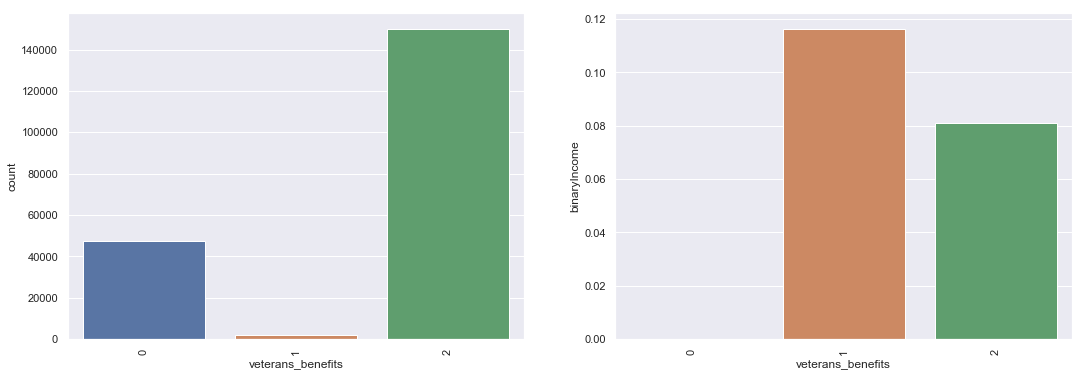

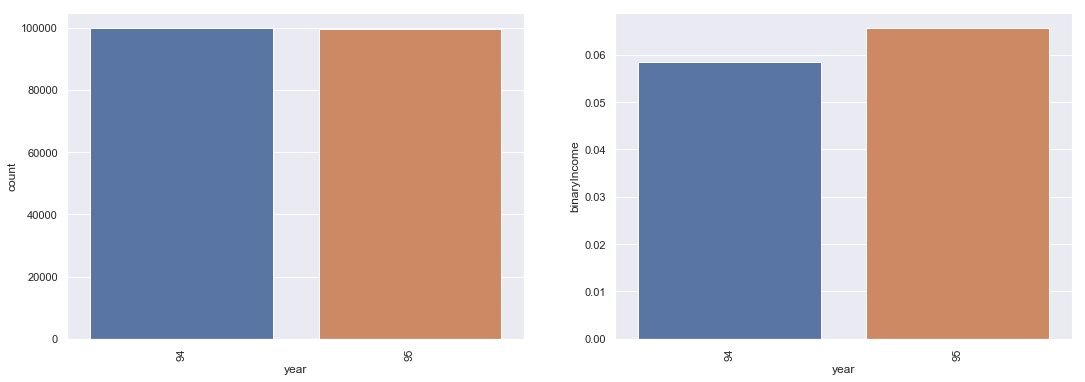

In [45]:
for i, col in enumerate(us_census_train.select_dtypes(['category'])):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    sns.countplot(x = col, data=us_census_train, ax=ax[0])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
    
    incomeByCol = us_census_train.groupby(col)['binaryIncome'].mean().reset_index()
    sns.barplot(x=col, y='binaryIncome', data=incomeByCol, ax=ax[1])
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

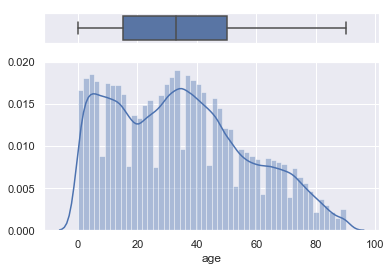

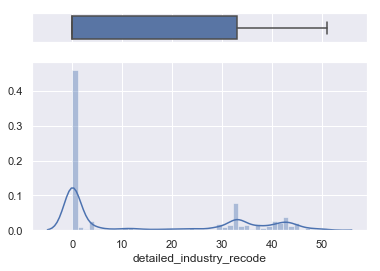

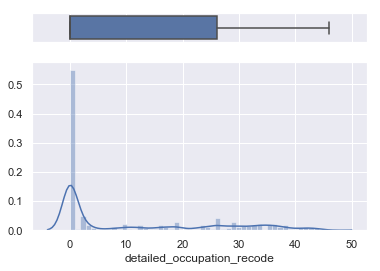

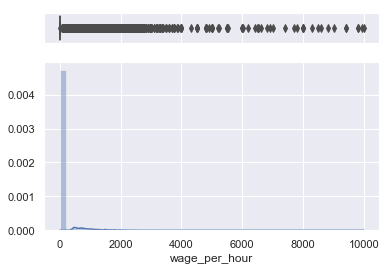

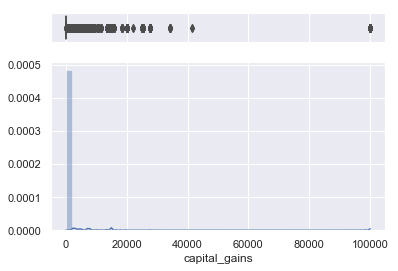

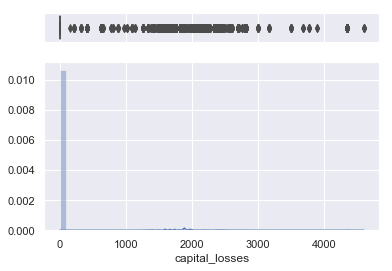

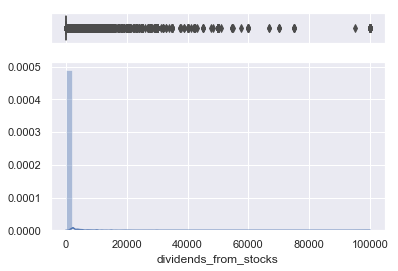

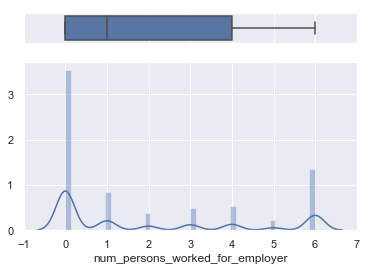

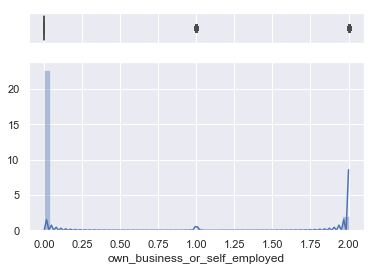

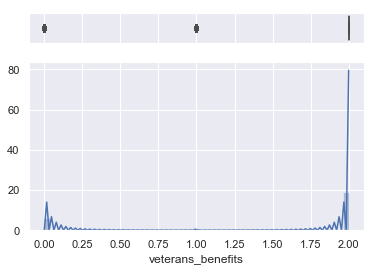

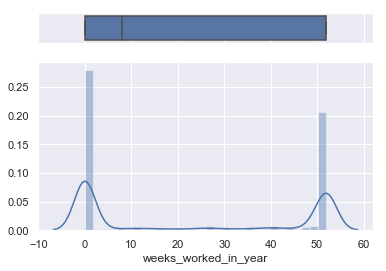

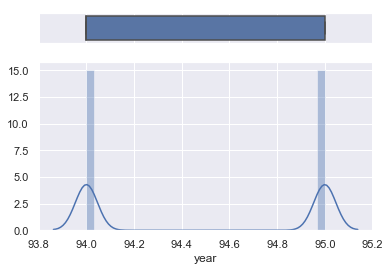

In [21]:
for i, col in enumerate(us_census_train.select_dtypes(['int64'])):
    # Cut the window in 2 parts
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(us_census_train[col], ax=ax[0])
    sns.distplot(us_census_train[col], ax=ax[1])

    # Remove x axis name for the boxplot
    ax[0].set(xlabel='')